In [112]:
import sqlite3
import pathlib
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from pyproj import Transformer
import numpy as np

In [7]:
# Locating files
current_file_path = pathlib.Path().resolve()
base_folder = current_file_path.parents[1]
database_path = base_folder.joinpath('Rail Analysis Project\\2. Data\\Database\\nrdp_fare_data.db')

In [9]:
# reading database table into a dataframe
db_conn = sqlite3.connect(database_path)
flow_fare_loc_df = pd.read_sql_query('SELECT * FROM flow_fare_location', db_conn)
db_conn.close()

In [10]:
flow_fare_loc_df

,FLOW_ID,TICKET_CODE,ORIGIN_CODE,DESTINATION_CODE,ORIGIN_NAME,DESTINATION_NAME,ORIGIN_LAT,ORIGIN_LON,DESTINATION_LAT,DESTINATION_LON,FARE_POUNDS,DISTANCE,POUND_PER_MILE
0,0183809,SDS,8600,8601,Achanalt,Achnasheen,57.609921,-4.914243,57.579205,-5.072421,3.8,6.48,0.586420
1,0184198,SDS,8600,8660,Achanalt,Lochluichart,57.609921,-4.914243,57.621277,-4.809628,2.9,4.18,0.693780
2,0180761,SDS,8606,8639,Altnabreac,Forsinard,58.388439,-3.705279,58.356998,-3.896903,4.5,8.09,0.556242
3,0185252,SDS,8606,8672,Altnabreac,Scotscalder,58.388439,-3.705279,58.482891,-3.553764,4.9,9.08,0.539648
4,0114987,SDS,5131,5208,Abbey Wood,Plumstead,51.490719,0.120343,51.489590,0.082828,3.1,1.53,2.026144
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,0150453,SDS,5856,5703,Yeovil Pen Mill,Castle Cary,50.944466,-2.613461,51.099583,-2.522683,6.6,11.60,0.568966
3167,0150645,SDS,5856,5849,Yeovil Pen Mill,Thornford,50.944466,-2.613461,50.911377,-2.578890,3.3,3.16,1.044304
3168,0010168,SDS,0577,5121,Farringdon,City Thameslink,51.520071,-0.104665,51.514336,-0.103412,3.7,0.34,10.882353
3169,0010785,SDS,0577,1555,Farringdon,London St-Pancras,51.520071,-0.104665,51.531831,-0.126747,3.7,1.21,3.057851


<Axes: xlabel='FARE_POUNDS', ylabel='DISTANCE'>

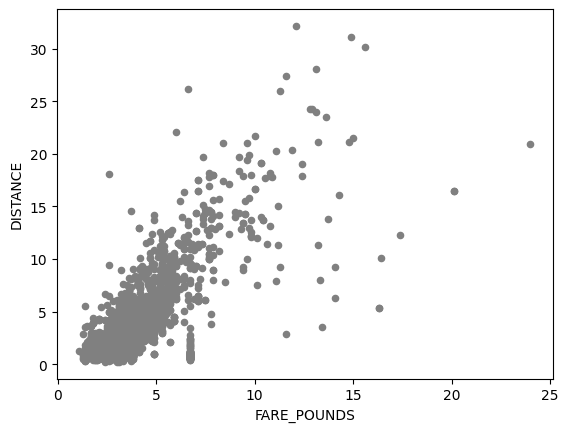

In [12]:
# Basic Scatter
flow_fare_loc_df.plot.scatter('FARE_POUNDS', 'DISTANCE', color='grey')

In [78]:
# Import Clustering Library

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

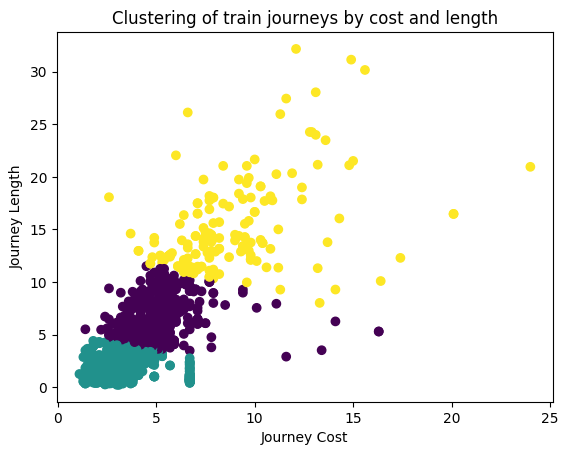

In [76]:
# Clustering Model: KMeans

X = flow_fare_loc_df[['FARE_POUNDS','DISTANCE']]

kmeans = KMeans(n_clusters=3, init='random')
kmeans.fit(X)
labels = kmeans.predict(X)

# Visualise Clustering Model
fig, ax = plt.subplots()
scatter = plt.scatter(X['FARE_POUNDS'],X['DISTANCE'], c=labels, label='Cluster')
plt.xlabel('Journey Cost')
plt.ylabel('Journey Length')
plt.title('Clustering of train journeys by cost and length')
plt.show()

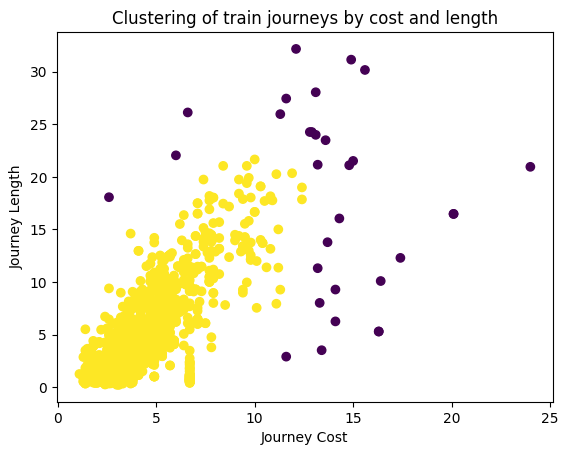

In [111]:
# Clustering Model: DBScan

X = flow_fare_loc_df[['FARE_POUNDS','DISTANCE']]

kmeans = DBSCAN(eps=2, min_samples=5)

labels = kmeans.fit(X).labels_

# Visualise Clustering Model
fig, ax = plt.subplots()
scatter = plt.scatter(X['FARE_POUNDS'],X['DISTANCE'], c=labels, label='Cluster')
plt.xlabel('Journey Cost')
plt.ylabel('Journey Length')
plt.title('Clustering of train journeys by cost and length')
plt.show()

<Axes: xlabel='DESTINATION_LON', ylabel='POUND_PER_MILE'>

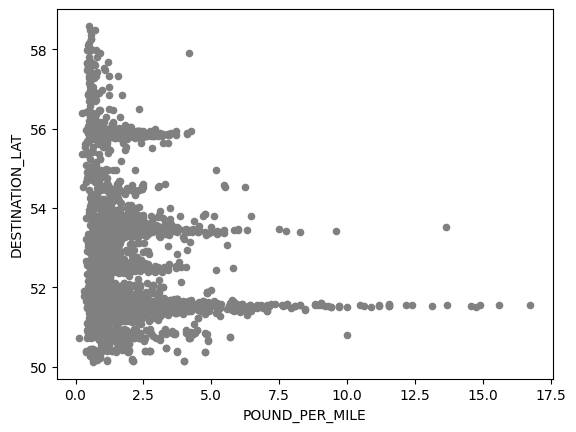

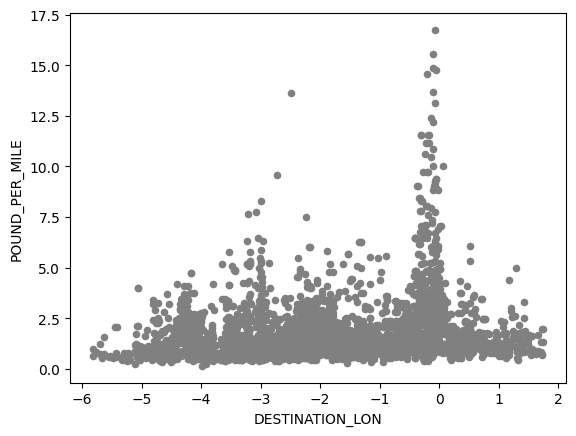

In [130]:
# Apply log transforms to FARE_POUNDS and DISTANCE fields

flow_fare_loc_df_log = flow_fare_loc_df.copy()
flow_fare_loc_df_log["FARE_POUNDS_LOG"] = np.log10(flow_fare_loc_df["FARE_POUNDS"])
flow_fare_loc_df_log["DISTANCE_LOG"] = np.log10(flow_fare_loc_df["DISTANCE"])

# Basic Scatter: Cost of Journeys per Mile Against Latitude/Lon
flow_fare_loc_df_log.plot.scatter('POUND_PER_MILE', 'DESTINATION_LAT', color='grey')
flow_fare_loc_df_log.plot.scatter('DESTINATION_LON', 'POUND_PER_MILE', color='grey')

In [ ]:
# How does change in lon/lat affect in price per mile? Is there a North/South divide more extreme than West/East?

In [123]:
flow_fare_loc_df

,FLOW_ID,TICKET_CODE,ORIGIN_CODE,DESTINATION_CODE,ORIGIN_NAME,DESTINATION_NAME,ORIGIN_LAT,ORIGIN_LON,DESTINATION_LAT,DESTINATION_LON,FARE_POUNDS,DISTANCE,POUND_PER_MILE
0,0183809,SDS,8600,8601,Achanalt,Achnasheen,57.609921,-4.914243,57.579205,-5.072421,3.8,6.48,0.586420
1,0184198,SDS,8600,8660,Achanalt,Lochluichart,57.609921,-4.914243,57.621277,-4.809628,2.9,4.18,0.693780
2,0180761,SDS,8606,8639,Altnabreac,Forsinard,58.388439,-3.705279,58.356998,-3.896903,4.5,8.09,0.556242
3,0185252,SDS,8606,8672,Altnabreac,Scotscalder,58.388439,-3.705279,58.482891,-3.553764,4.9,9.08,0.539648
4,0114987,SDS,5131,5208,Abbey Wood,Plumstead,51.490719,0.120343,51.489590,0.082828,3.1,1.53,2.026144
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,0150453,SDS,5856,5703,Yeovil Pen Mill,Castle Cary,50.944466,-2.613461,51.099583,-2.522683,6.6,11.60,0.568966
3167,0150645,SDS,5856,5849,Yeovil Pen Mill,Thornford,50.944466,-2.613461,50.911377,-2.578890,3.3,3.16,1.044304
3168,0010168,SDS,0577,5121,Farringdon,City Thameslink,51.520071,-0.104665,51.514336,-0.103412,3.7,0.34,10.882353
3169,0010785,SDS,0577,1555,Farringdon,London St-Pancras,51.520071,-0.104665,51.531831,-0.126747,3.7,1.21,3.057851
